## Part I: <span style="color:blue">Descriptive Statistics</span>

In [60]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)
import warnings
warnings.filterwarnings('ignore')

---------------------------------------------------------------------------

In [41]:
df_raw= pd.read_csv('DF_Raw_Data.csv')
df_stdev= pd.read_csv('DF_Rolling_Stdev.csv')

df_raw.describe()

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
count,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000
mean,41.802629,41.796702,90.796576,202.851610,50.226661,3.540897,76.015149,0.021199
std,3.656576,3.654873,10.217885,22.683977,5.298203,0.579055,6.651633,0.144075
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.050000,41.000000,85.000000,191.000000,48.000000,3.220000,74.560000,0.000000
50%,42.100000,42.140000,91.000000,203.000000,51.000000,3.480000,76.620000,0.000000
75%,43.140000,43.130000,97.000000,215.000000,53.000000,3.780000,78.470000,0.000000
max,45.900000,45.840000,124.000000,264.000000,65.000000,7.560000,83.450000,1.000000


In [42]:
df_stdev.describe()

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
count,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.00000,2452.000000,2452.000000
mean,1.485126,1.497361,6.648308,13.945338,3.436370,0.37060,2.725232,0.021207
std,2.294950,2.282053,5.722897,12.394302,3.043042,0.29979,4.186723,0.144104
min,0.380000,0.640000,0.580000,5.000000,0.900000,0.11000,1.170000,0.000000
25%,1.070000,1.080000,5.520000,11.210000,2.920000,0.28000,1.960000,0.000000
50%,1.160000,1.170000,5.990000,12.180000,3.160000,0.32000,2.120000,0.000000
75%,1.230000,1.260000,6.460000,13.110000,3.370000,0.36000,2.270000,0.000000
max,21.390000,21.530000,59.310000,124.710000,30.650000,3.32000,39.150000,1.000000


---------------------------------------------------------------------------

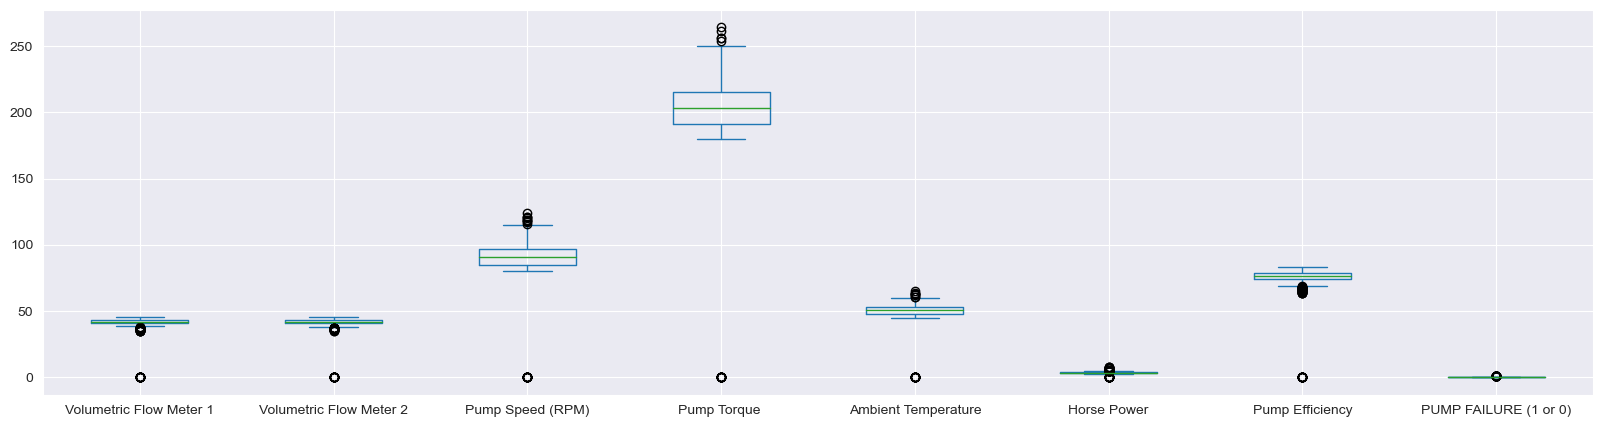

In [43]:
df_raw.plot(y=["Volumetric Flow Meter 1", "Volumetric Flow Meter 2", "Pump Speed (RPM)", "Pump Torque ", "Ambient Temperature", "Horse Power", "Pump Efficiency", "PUMP FAILURE (1 or 0)"], kind="box")

plt.show()

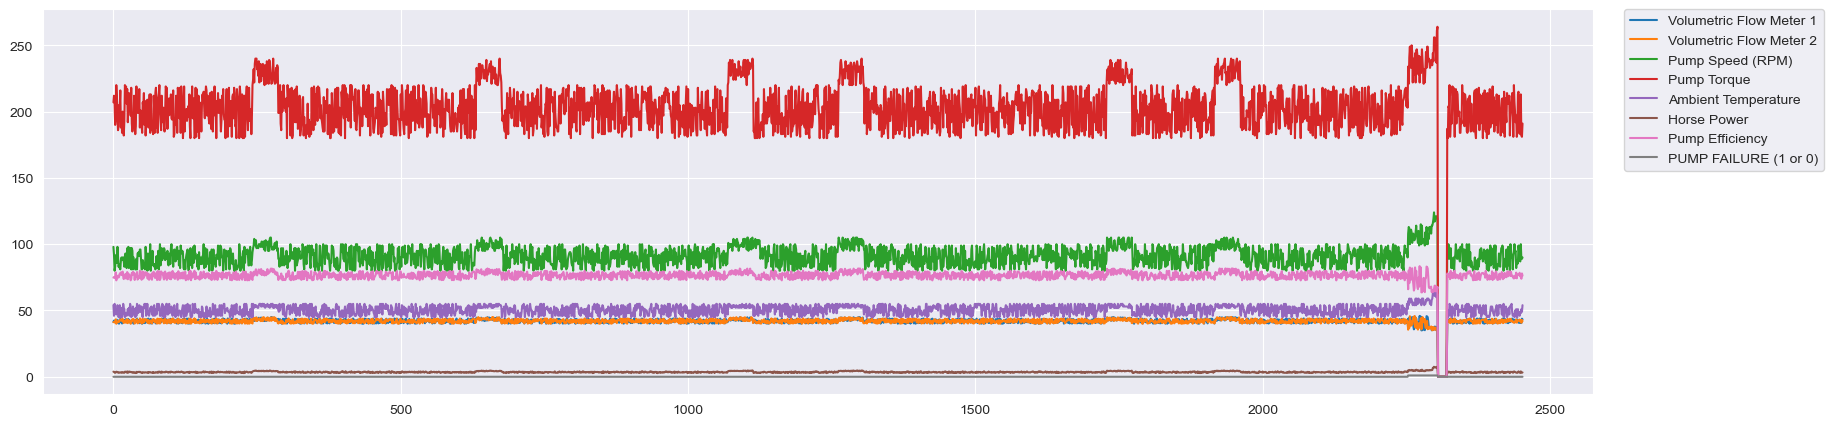

In [44]:
df_raw.plot(y=["Volumetric Flow Meter 1", "Volumetric Flow Meter 2", "Pump Speed (RPM)", "Pump Torque ", "Ambient Temperature", "Horse Power", "Pump Efficiency", "PUMP FAILURE (1 or 0)"], kind="line")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

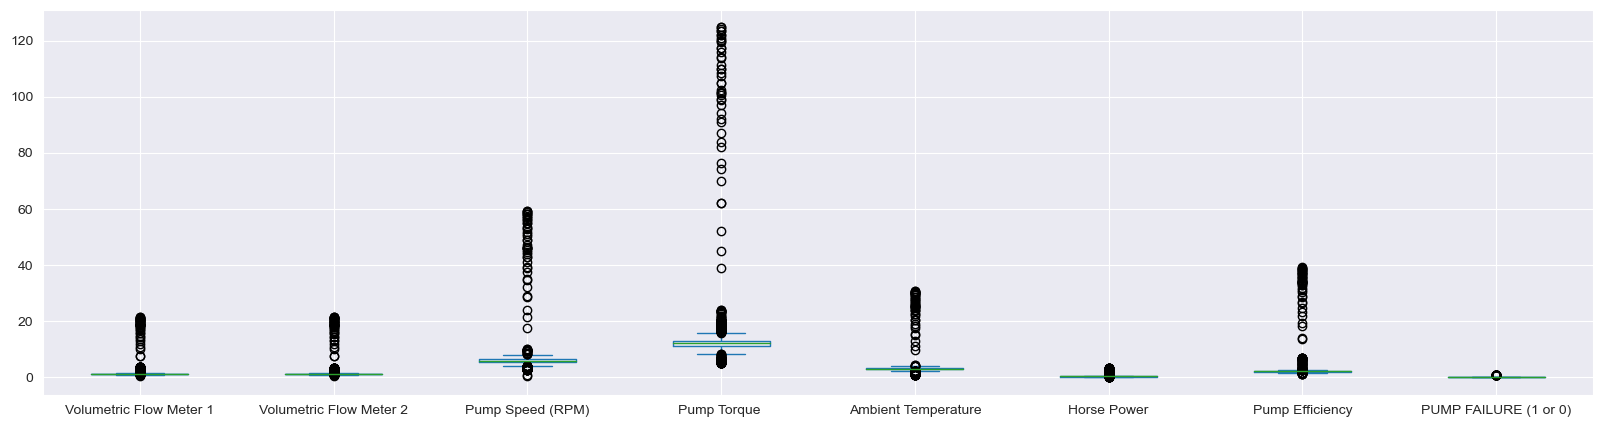

In [35]:
df_stdev.plot(y=["Volumetric Flow Meter 1", "Volumetric Flow Meter 2", "Pump Speed (RPM)", "Pump Torque ", "Ambient Temperature", "Horse Power", "Pump Efficiency", "PUMP FAILURE (1 or 0)"], kind="box")

plt.show()

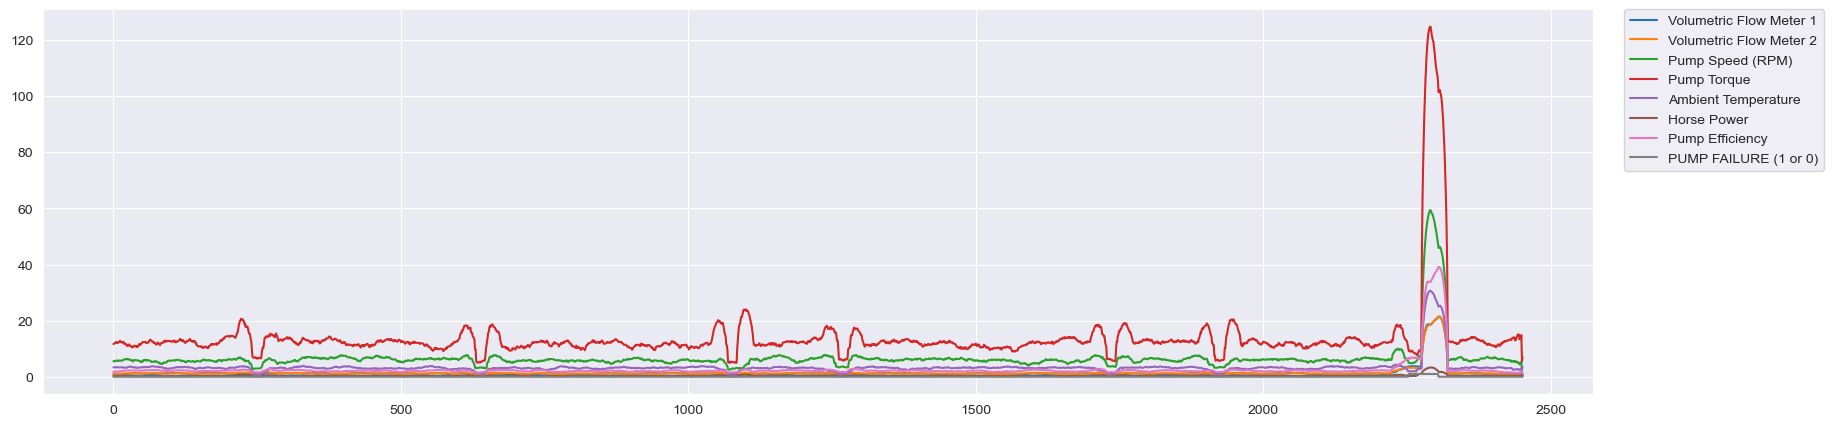

In [36]:
df_stdev.plot(y=["Volumetric Flow Meter 1", "Volumetric Flow Meter 2", "Pump Speed (RPM)", "Pump Torque ", "Ambient Temperature", "Horse Power", "Pump Efficiency", "PUMP FAILURE (1 or 0)"], kind="line")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

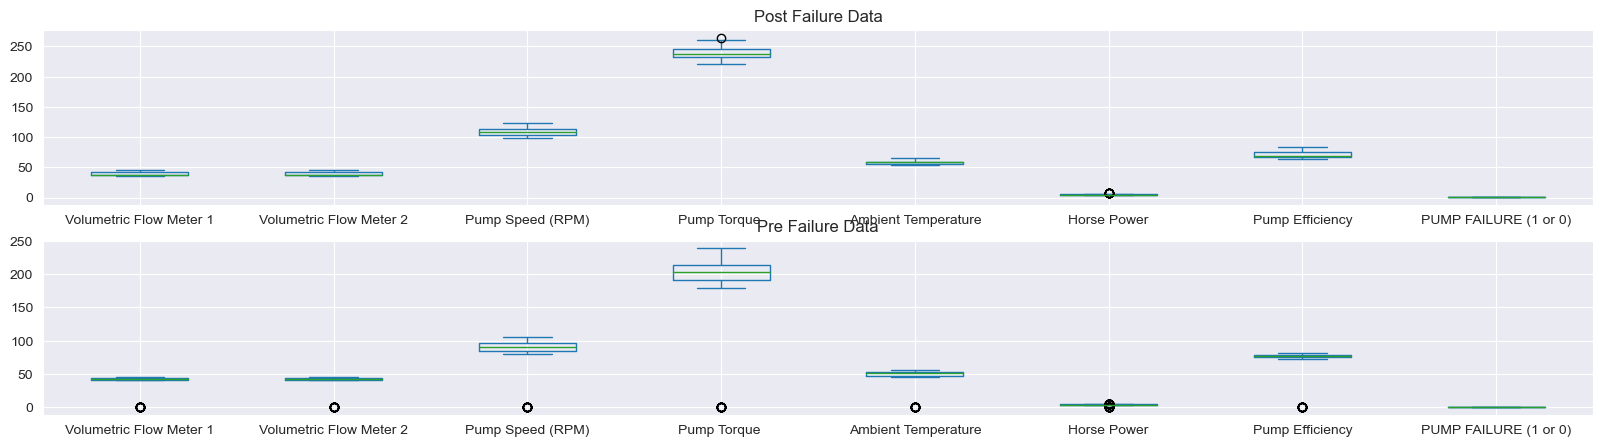

In [65]:
# Subset the data based on Pump Failure variable
df_failure = df_raw[df_raw["PUMP FAILURE (1 or 0)"] == 1]
df_no_failure = df_raw[df_raw["PUMP FAILURE (1 or 0)"] == 0]

# Plot box plots for each subset
fig, axes = plt.subplots(nrows=2, ncols=1)
df_failure.plot(ax=axes[0], kind="box", title="Post Failure Data")
df_no_failure.plot(ax=axes[1], kind="box", title="Pre Failure Data")
plt.show()

In [66]:
# Calculate Q1 and Q3
Q1 = df_raw.quantile(0.25)
Q3 = df_raw.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Print IQR to screen
print(IQR)

Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64


In [71]:
Lower_Limit = Q1 - 1.5 * IQR
Upper_Limit = Q3 + 1.5 * IQR

Outliers = df_raw [((df_raw < Lower_Limit) | ((df_raw > Upper_Limit))).any(axis=1)]
num_outliers= len(Outliers.index)
total_rows= df_raw.shape[0]
percent= ((total_rows-num_outliers)/total_rows *100)
print(percent)

96.12719119445576


---------------------------------------------------------------------------

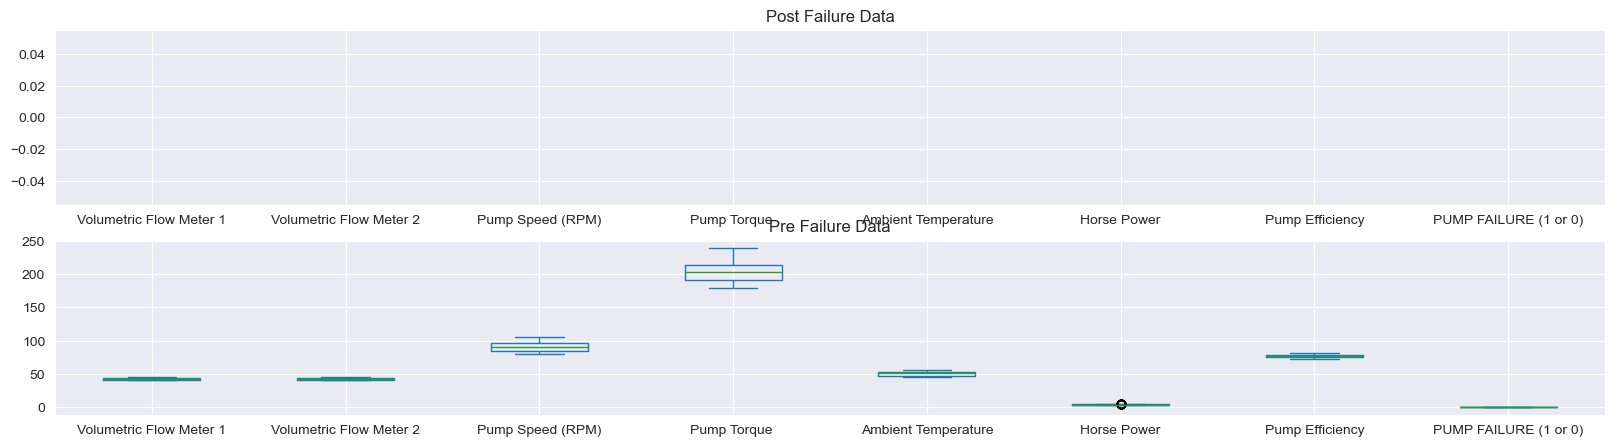

In [74]:
no_outliers = df_raw[~(((df_raw < Lower_Limit) | ((df_raw > Upper_Limit))).any(axis=1))]

# Subset the data based on Pump Failure variable
df_failure = no_outliers[no_outliers["PUMP FAILURE (1 or 0)"] == 1]
df_no_failure = no_outliers[no_outliers["PUMP FAILURE (1 or 0)"] == 0]

# Plot box plots for each subset
fig, axes = plt.subplots(nrows=2, ncols=1)
df_failure.plot(ax=axes[0], kind="box", title="Post Failure Data")
df_no_failure.plot(ax=axes[1], kind="box", title="Pre Failure Data")
plt.show()

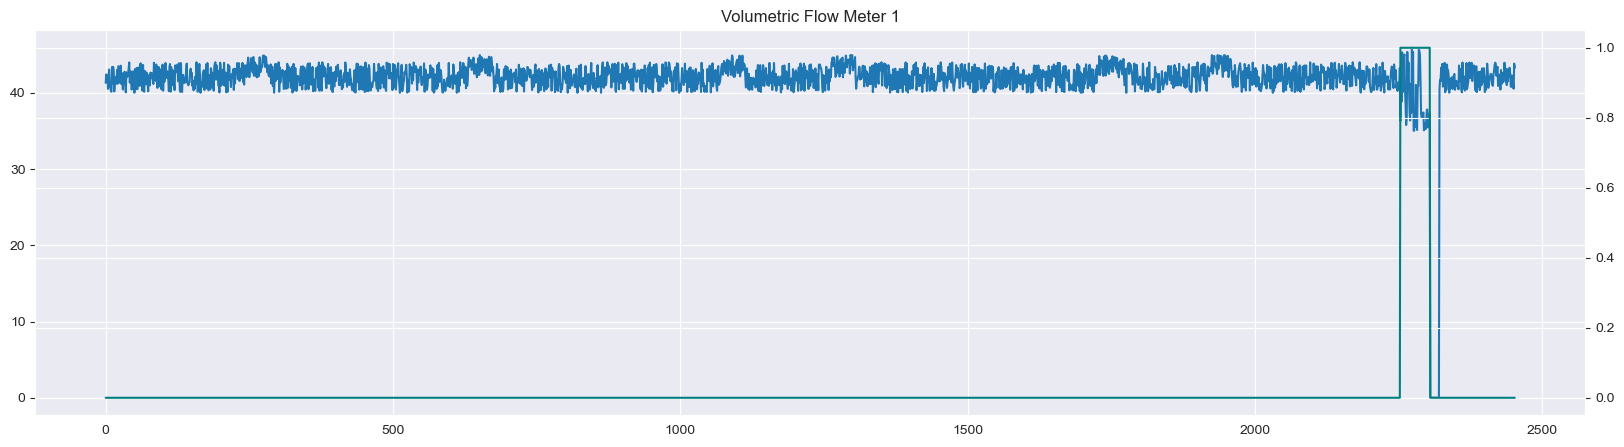

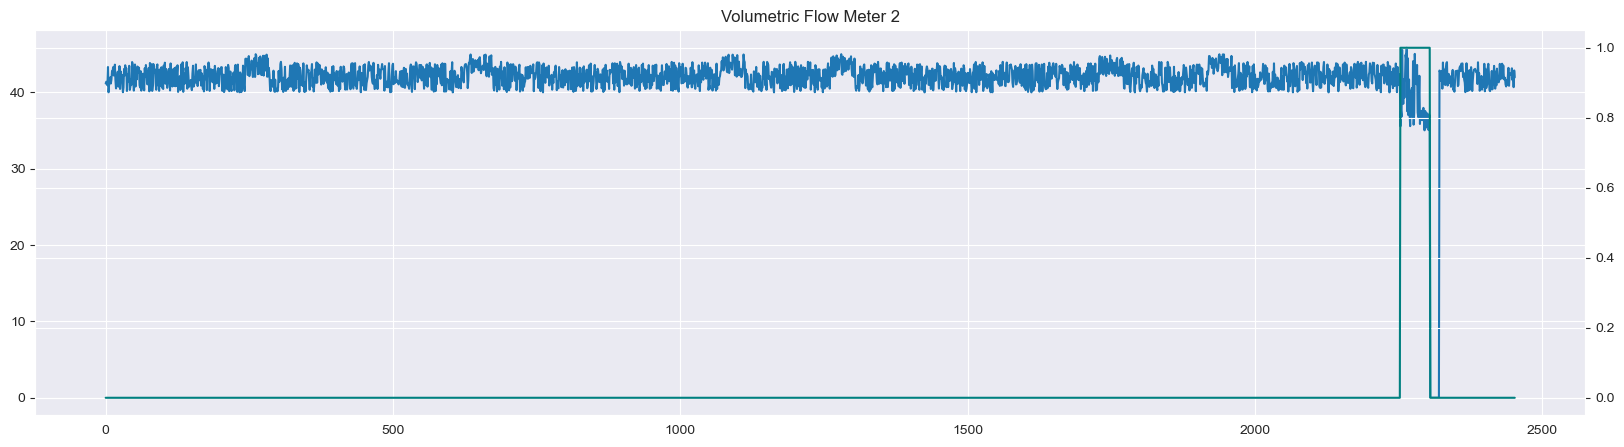

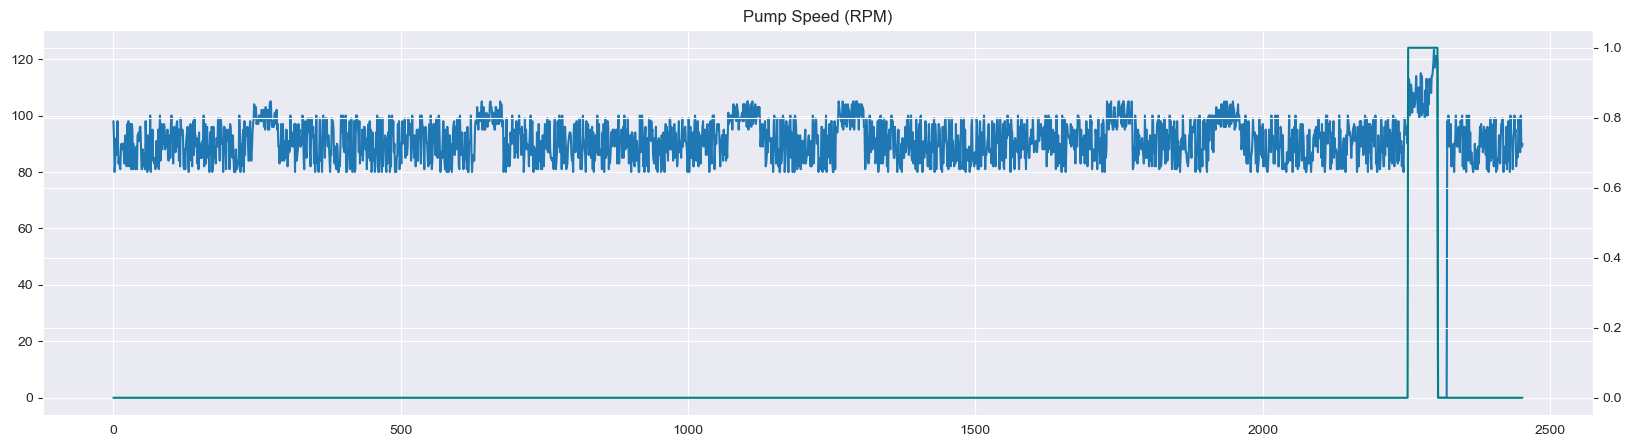

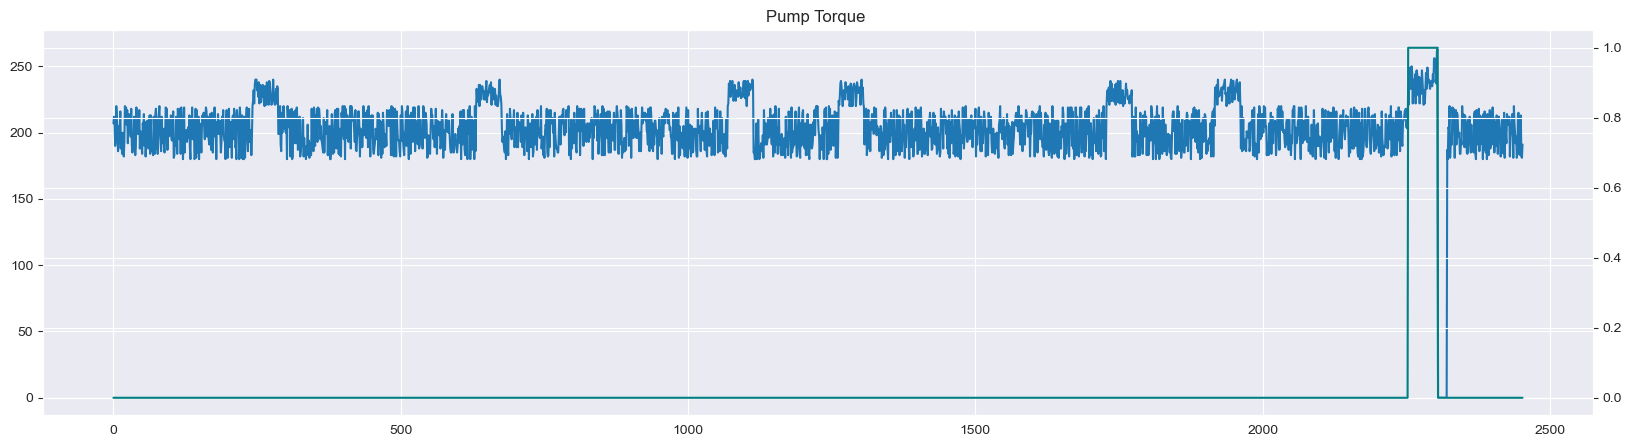

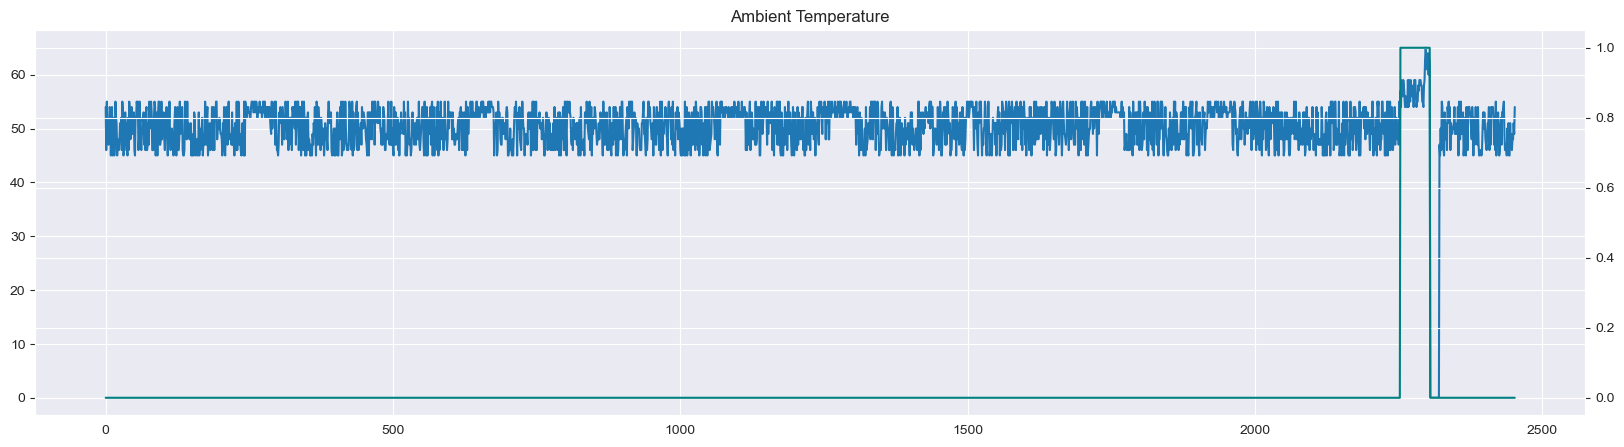

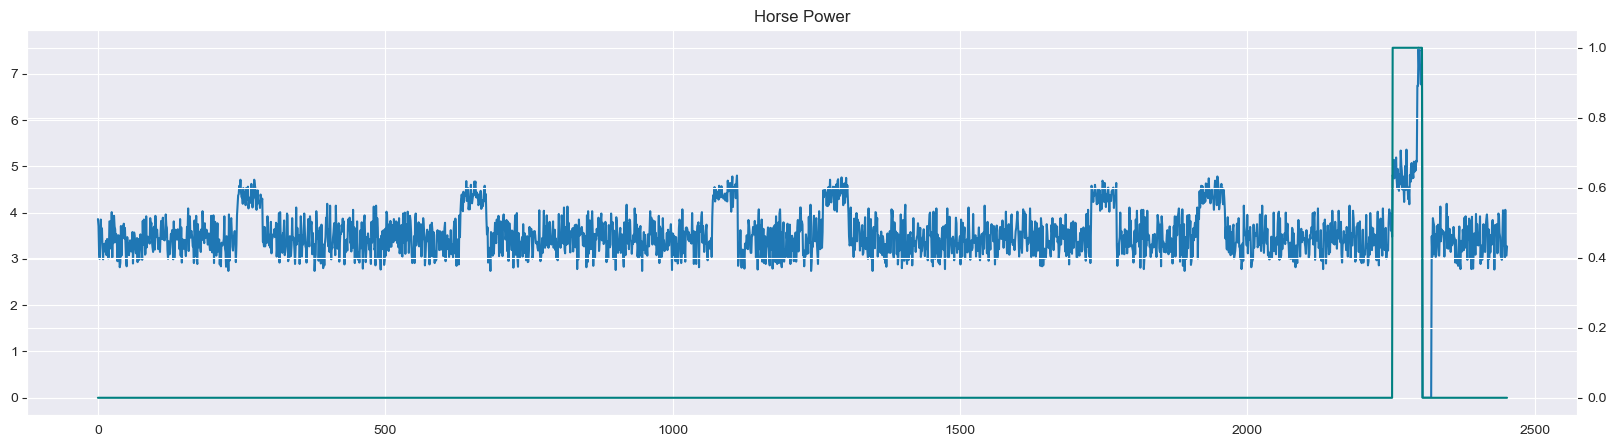

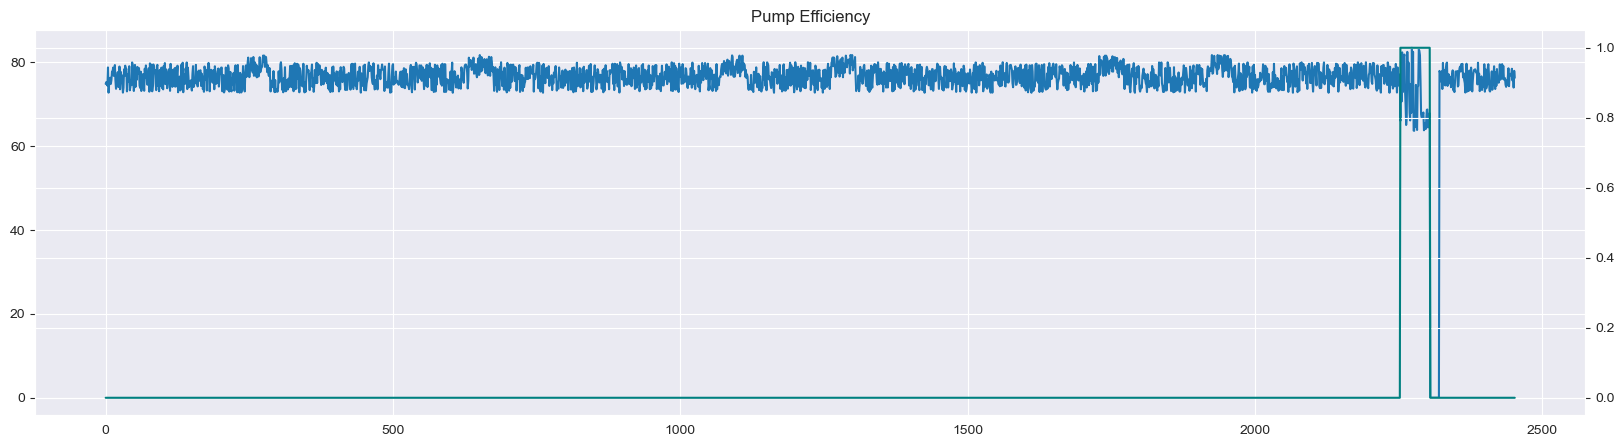

In [82]:
ListOfVariables= df_raw[["Volumetric Flow Meter 1", "Volumetric Flow Meter 2", "Pump Speed (RPM)", "Pump Torque ", "Ambient Temperature", "Horse Power", "Pump Efficiency"]]

for item in ListOfVariables:
    fig, ax= plt.subplots()
    first_axis = df_raw[item].plot()
    second_axis = first_axis.twinx()
    second_axis.plot(df_raw['PUMP FAILURE (1 or 0)'], color='teal')
    plt.title(item)
    plt.show()

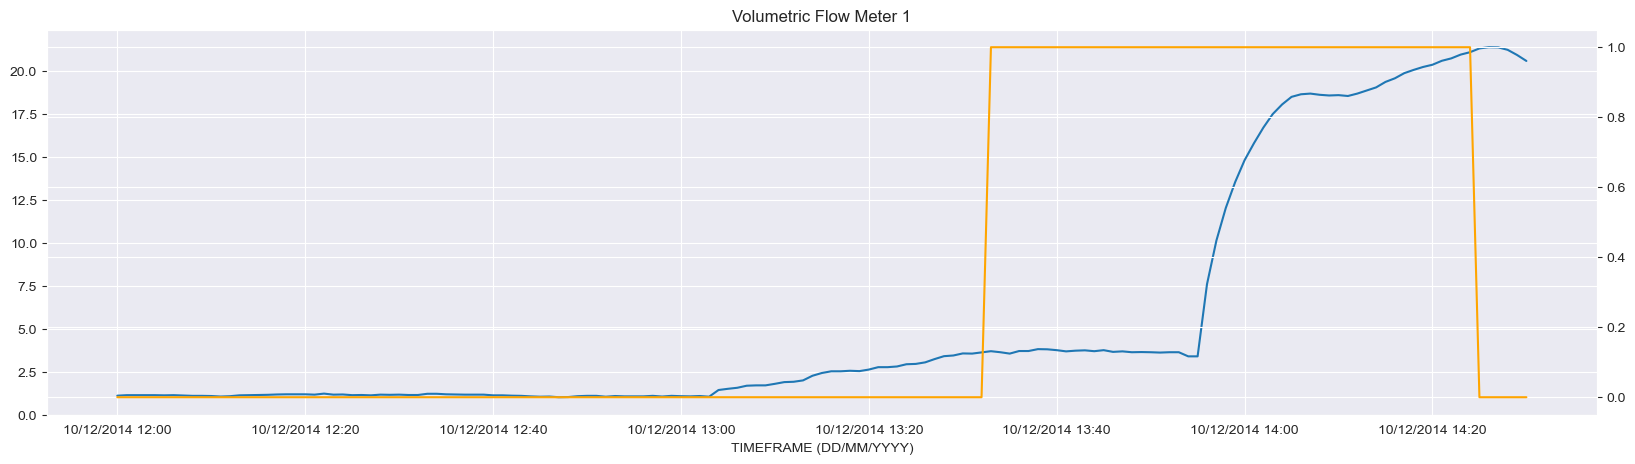

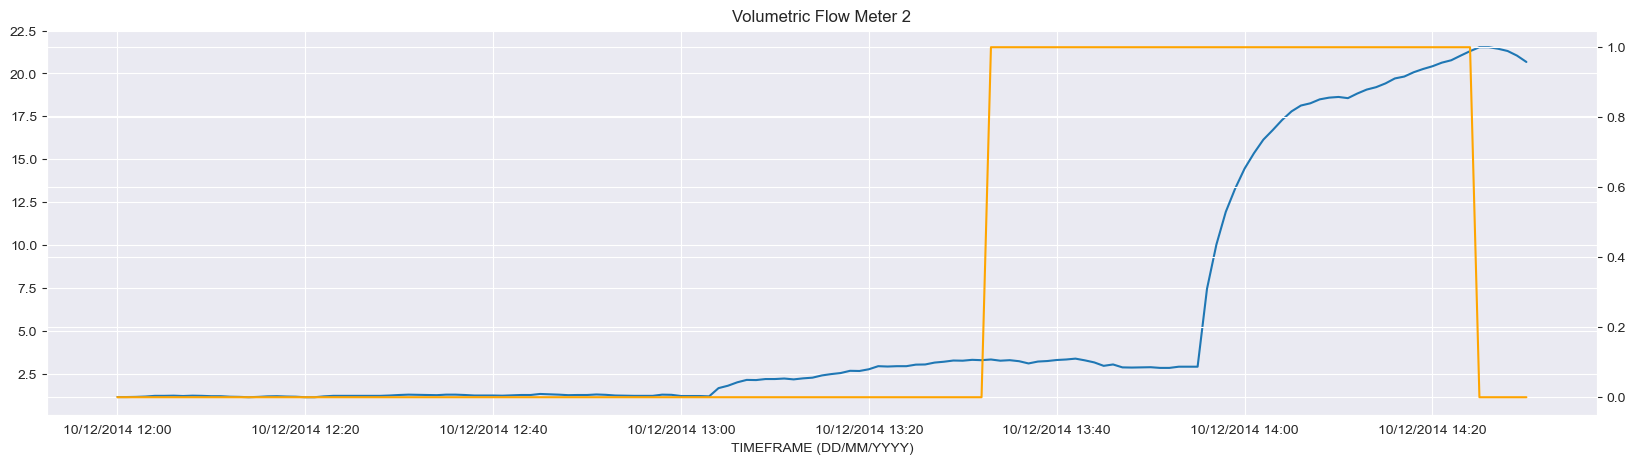

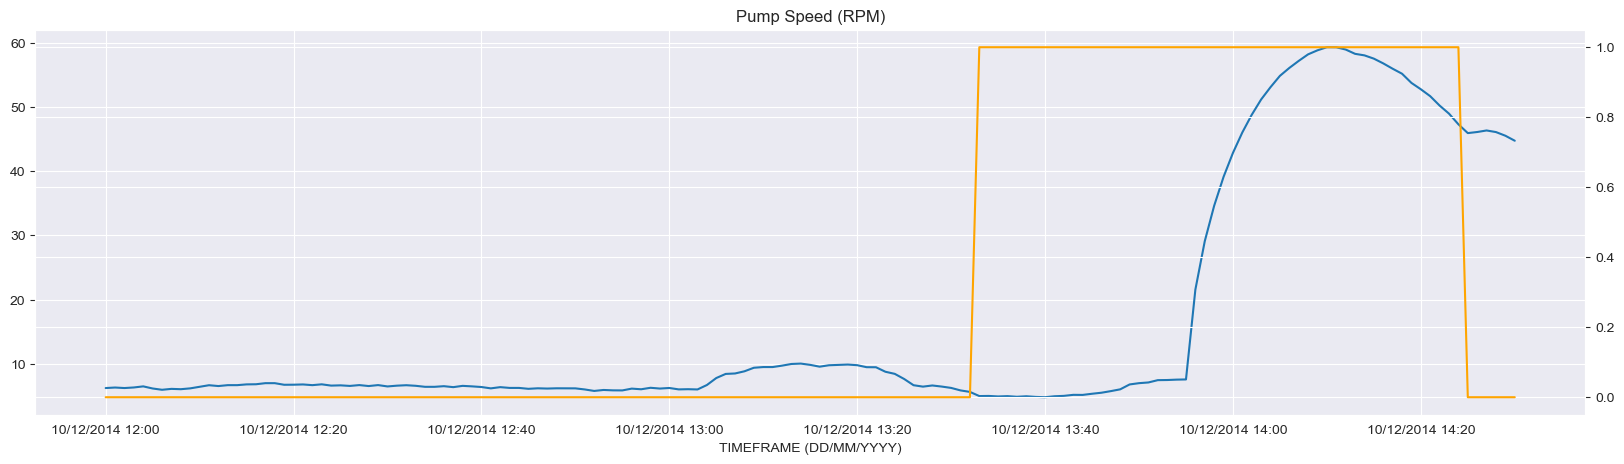

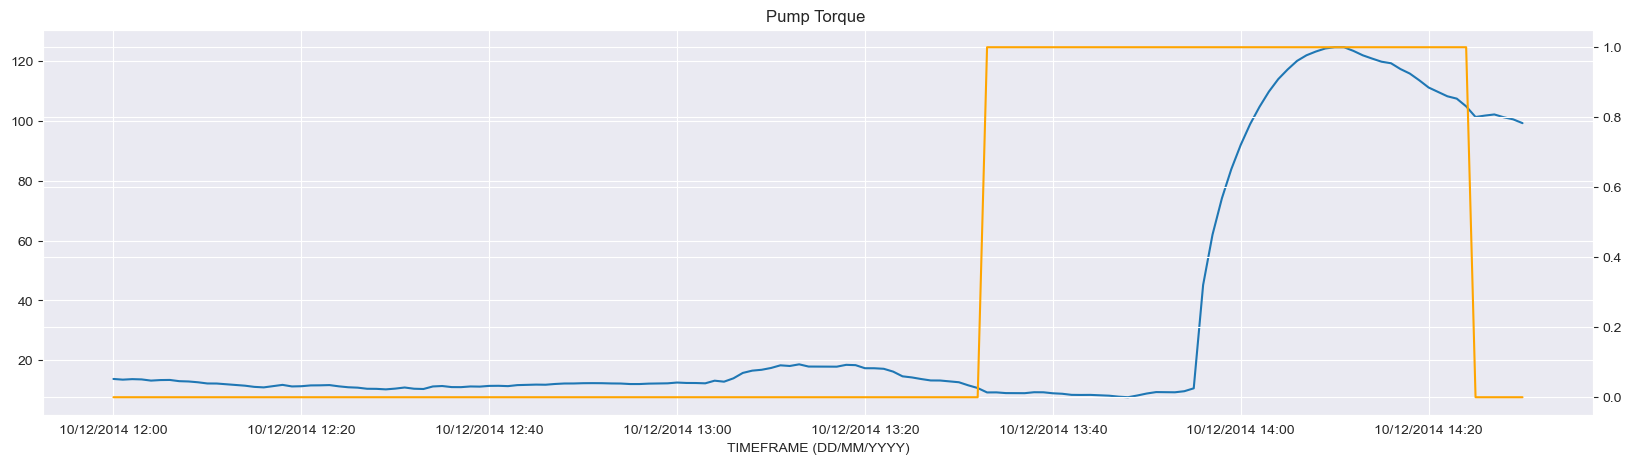

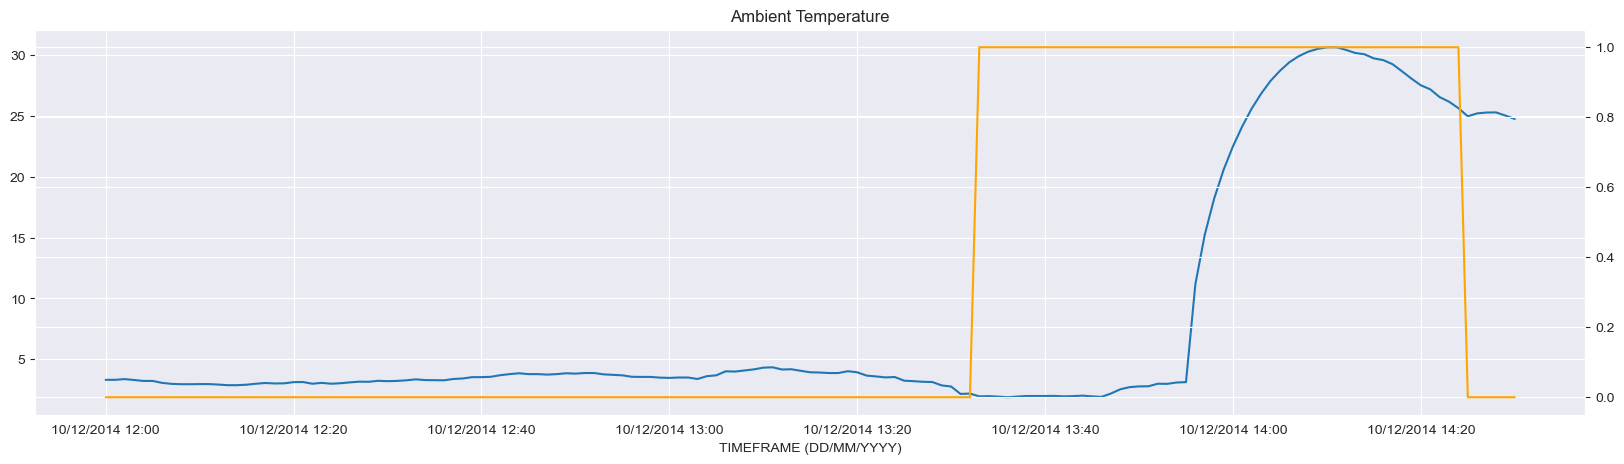

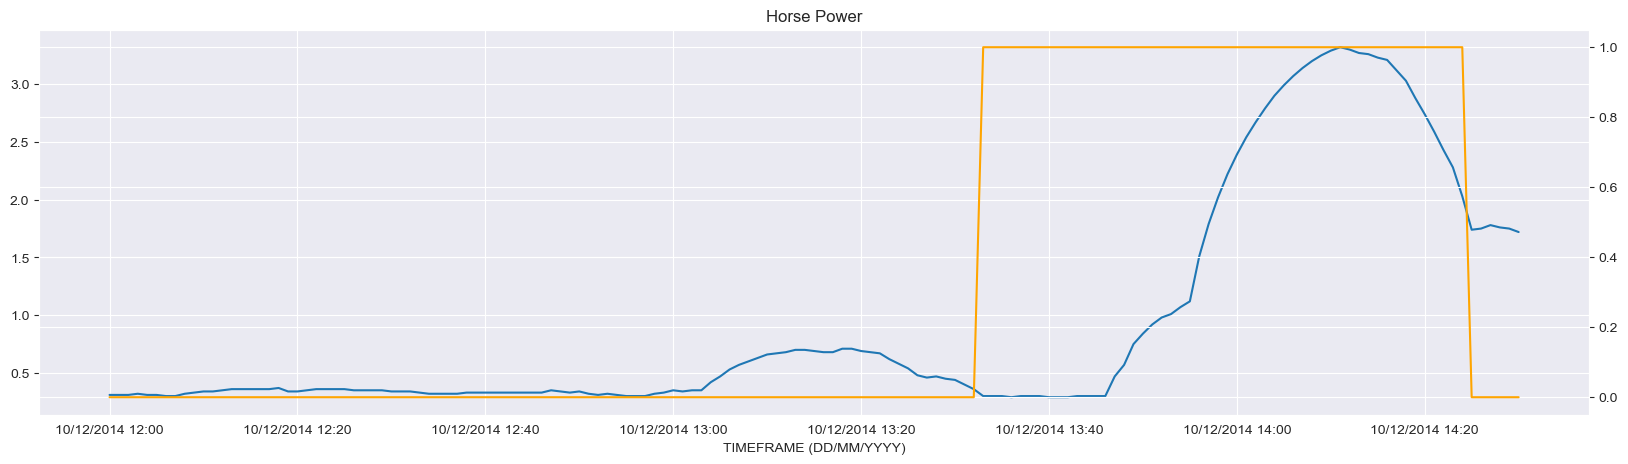

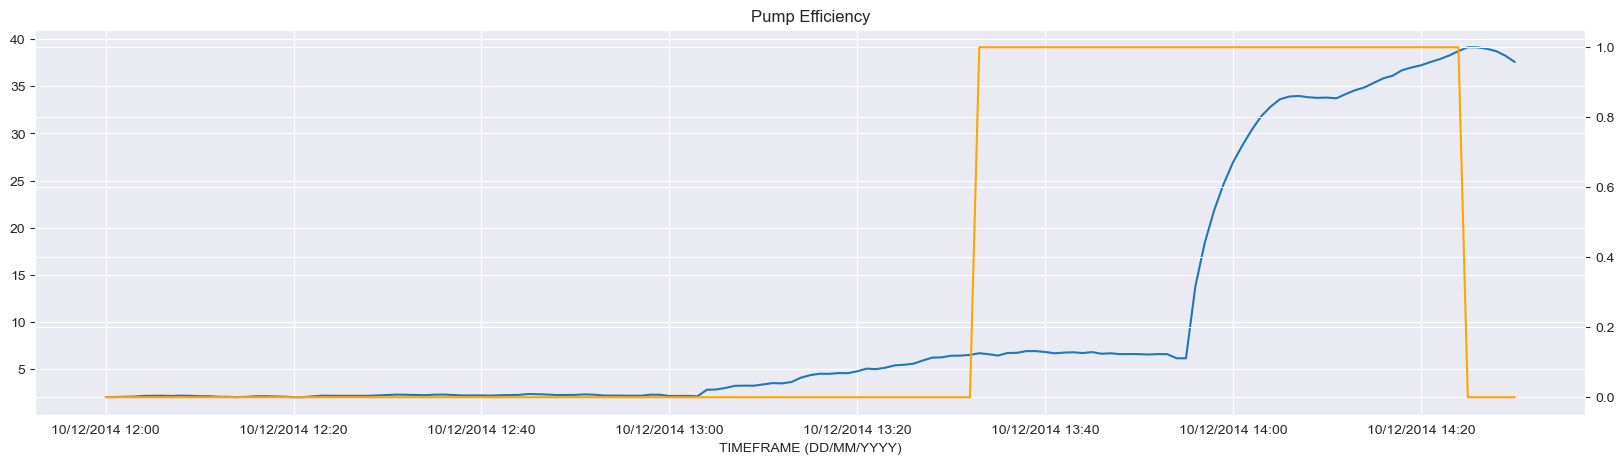

In [87]:
df_stdev_t = df_stdev.set_index('TIMEFRAME (DD/MM/YYYY)')

dataframe_time_filtered = df_stdev_t[(df_stdev_t.index >= '10/12/2014 12:00') & (df_stdev_t.index <= '10/12/2014 14:30')]

for item in ListOfVariables:
    first_axis = dataframe_time_filtered[item].plot() #We are looping through every item in the dataframe.
    first_axis.xaxis.set_major_locator(plt.MaxNLocator(10)) #This will ensure we only plot a maximum of 10 Time Stamps
    second_axis = first_axis.twinx() #The Twinx function is used to ensure we share the X-Axis for both plots
    second_axis.plot(dataframe_time_filtered['PUMP FAILURE (1 or 0)'], color='orange')
    second_axis.xaxis.set_major_locator(plt.MaxNLocator(10))
    plt.title(item)
    plt.show()

## Part II: <span style="color:blue">Inferential Statistical Analysis</span>

<AxesSubplot:>

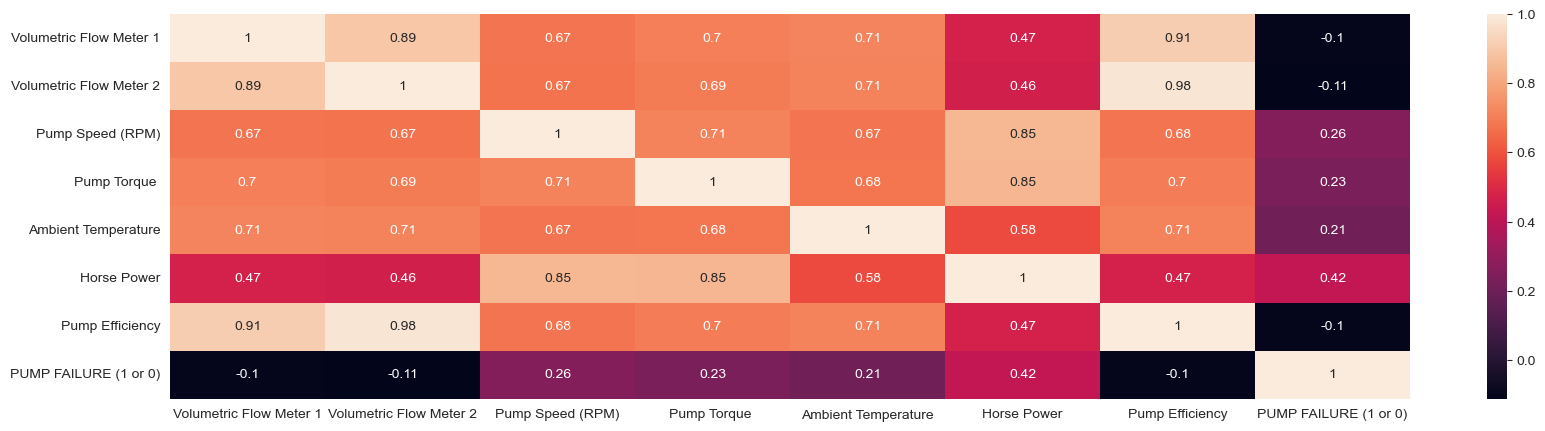

In [91]:
df= df_raw.corr()
sns.heatmap(df, annot=True)

In [94]:
df= df_raw.corr()
pd.DataFrame(df)
print(df)

                         Volumetric Flow Meter 1  Volumetric Flow Meter 2  \
Volumetric Flow Meter 1                 1.000000                 0.893058   
Volumetric Flow Meter 2                 0.893058                 1.000000   
Pump Speed (RPM)                        0.674691                 0.671896   
Pump Torque                             0.700425                 0.692183   
Ambient Temperature                     0.713913                 0.710423   
Horse Power                             0.470081                 0.462087   
Pump Efficiency                         0.913014                 0.980144   
PUMP FAILURE (1 or 0)                  -0.102508                -0.112115   

                         Pump Speed (RPM)  Pump Torque   Ambient Temperature  \
Volumetric Flow Meter 1          0.674691      0.700425             0.713913   
Volumetric Flow Meter 2          0.671896      0.692183             0.710423   
Pump Speed (RPM)                 1.000000      0.711037           

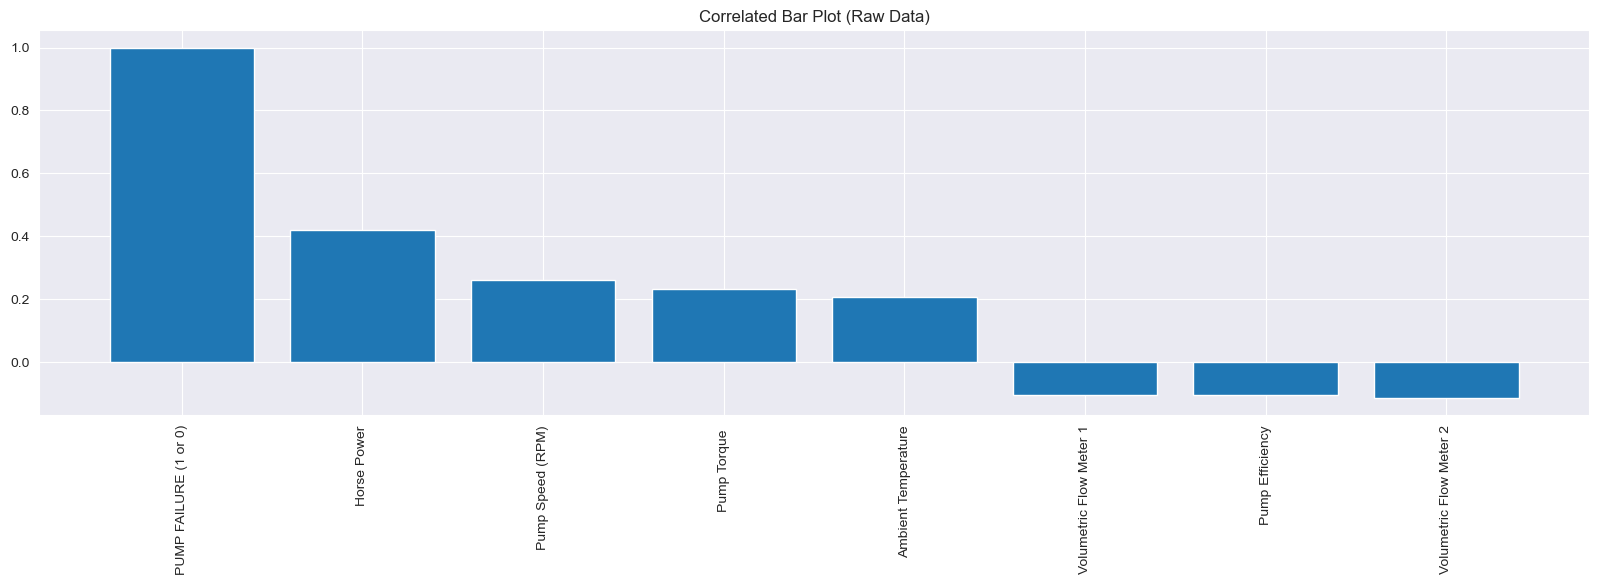

In [105]:
correlations = df.loc['PUMP FAILURE (1 or 0)'].sort_values(ascending=False)

plt.bar(correlations.index, correlations.values)
plt.xticks(rotation=90)
plt.title('Correlated Bar Plot (Raw Data)')
plt.show()


<AxesSubplot:>

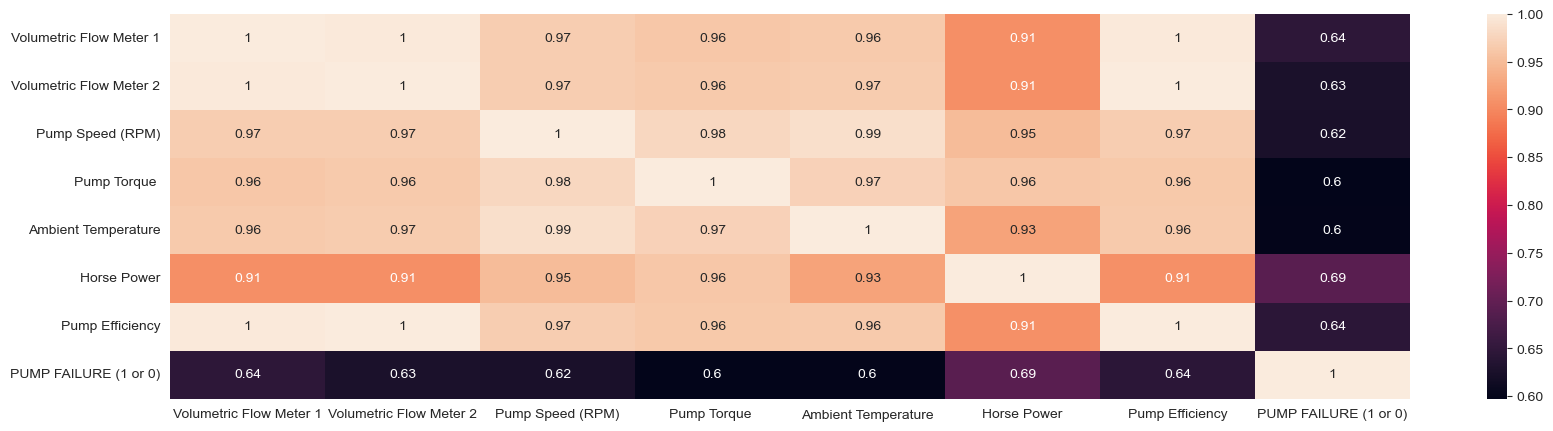

In [107]:
df_sd= df_stdev.corr()
sns.heatmap(df_sd, annot=True)

In [115]:
#Dataframe_Raw
independent_variables= ["Volumetric Flow Meter 1", "Volumetric Flow Meter 2", "Pump Speed (RPM)", "Pump Torque ", "Ambient Temperature", "Horse Power", "Pump Efficiency"]
dependent_variable= ['PUMP FAILURE (1 or 0)']

x = sm.add_constant(df_raw[independent_variables])
y = df_raw[dependent_variable]
regression_model = sm.OLS(y,x).fit() 
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.362
Model:                               OLS   Adj. R-squared:                  0.360
Method:                    Least Squares   F-statistic:                     197.9
Date:                   Fri, 03 Mar 2023   Prob (F-statistic):          5.58e-233
Time:                           14:39:05   Log-Likelihood:                 1823.0
No. Observations:                   2453   AIC:                            -3630.
Df Residuals:                       2445   BIC:                            -3583.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1138      0.028      4.058      0.000       0.059       0.169
Volumetric Flow Meter 1    -0.0145      0.002     -7.974      0.000      -0.018      -0.011
Volumetric Flow Meter 2    -0.0184      0.003     -5.497      0.000      -0.025      -0.012
Pump Speed (RPM)            0.0021      0.001      2.589      0.010       0.001       0.004
Pump Torque                 0.0007      0.000      1.801      0.072   -6.24e-05       0.001
Ambient Temperature         0.0099      0.001     14.159      0.000       0.009       0.011
Horse Power                 0.0827      0.019      4.373      0.000       0.046       0.120
Pump Efficiency             0.0020      0.002      1.028      0.304      -0.002       0.006
==============================================================================
Omnibus:                     2071.669   Durbin-Watson:                   0.458
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58977.621
Skew:                           3.929   Prob(JB):                         0.00
Kurtosis:                      25.700   Cond. No.                     3.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
#Dataframe_Stdev
independent_variables= ["Volumetric Flow Meter 1", "Volumetric Flow Meter 2", "Pump Speed (RPM)", "Pump Torque ", "Ambient Temperature", "Horse Power", "Pump Efficiency"]
dependent_variable= ['PUMP FAILURE (1 or 0)']

x = sm.add_constant(df_stdev[independent_variables])
y = df_stdev[dependent_variable]
regression_model = sm.OLS(y,x).fit() 
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.778
Model:                               OLS   Adj. R-squared:                  0.778
Method:                    Least Squares   F-statistic:                     1225.
Date:                   Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                           15:21:24   Log-Likelihood:                 3117.4
No. Observations:                   2452   AIC:                            -6219.
Df Residuals:                       2444   BIC:                            -6172.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0354      0.004    -10.045      0.000      -0.042      -0.029
Volumetric Flow Meter 1     0.0513      0.010      5.109      0.000       0.032       0.071
Volumetric Flow Meter 2    -0.6085      0.020    -30.450      0.000      -0.648      -0.569
Pump Speed (RPM)           -0.0178      0.002     -9.057      0.000      -0.022      -0.014
Pump Torque                -0.0189      0.001    -22.511      0.000      -0.020      -0.017
Ambient Temperature         0.0178      0.003      5.773      0.000       0.012       0.024
Horse Power                 0.7636      0.022     35.045      0.000       0.721       0.806
Pump Efficiency             0.3407      0.012     28.118      0.000       0.317       0.364
==============================================================================
Omnibus:                     1432.369   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72092.923
Skew:                           2.052   Prob(JB):                         0.00
Kurtosis:                      29.245   Cond. No.                         426.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

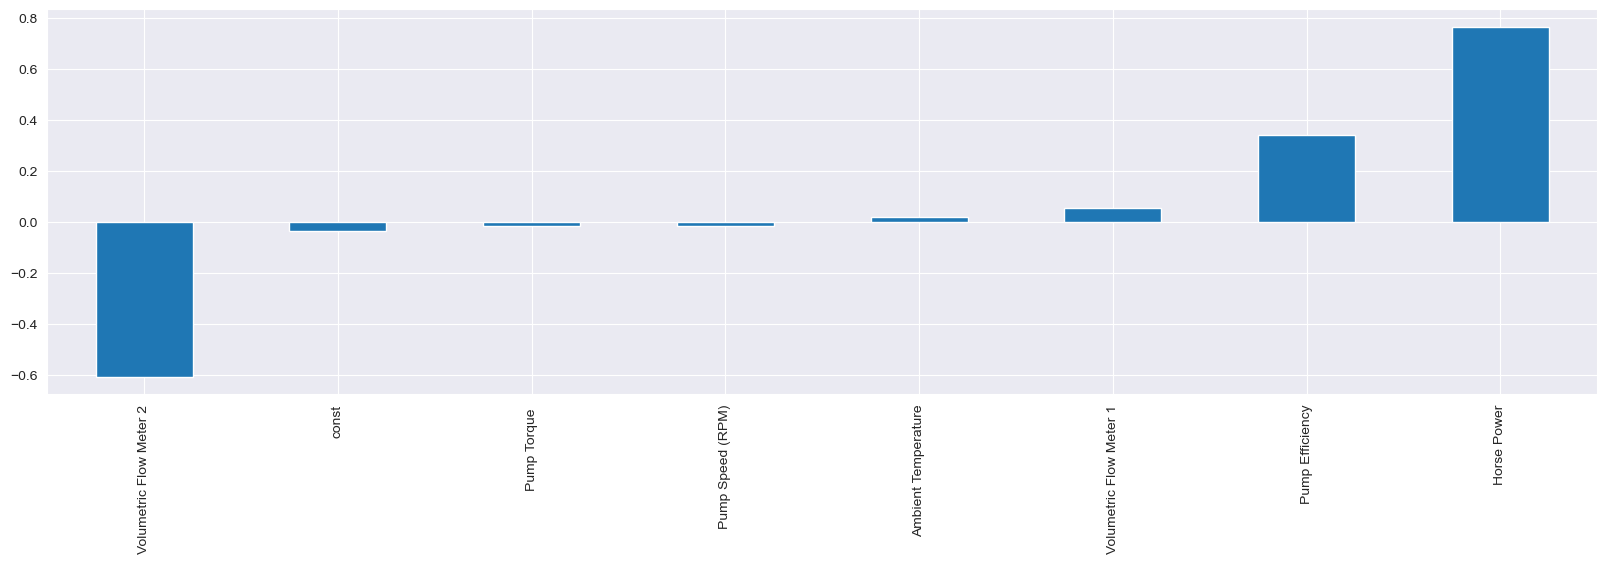

In [138]:
independent_variables= ["Volumetric Flow Meter 1", "Volumetric Flow Meter 2", "Pump Speed (RPM)", "Pump Torque ", "Ambient Temperature", "Horse Power", "Pump Efficiency"]
dependent_variable= ['PUMP FAILURE (1 or 0)']

x = sm.add_constant(df_stdev[independent_variables])
y = df_stdev[dependent_variable]
regression_model = sm.OLS(y,x).fit() 
regression_model.summary()

regression_model.params.sort_values().plot(kind='bar')
plt.show()

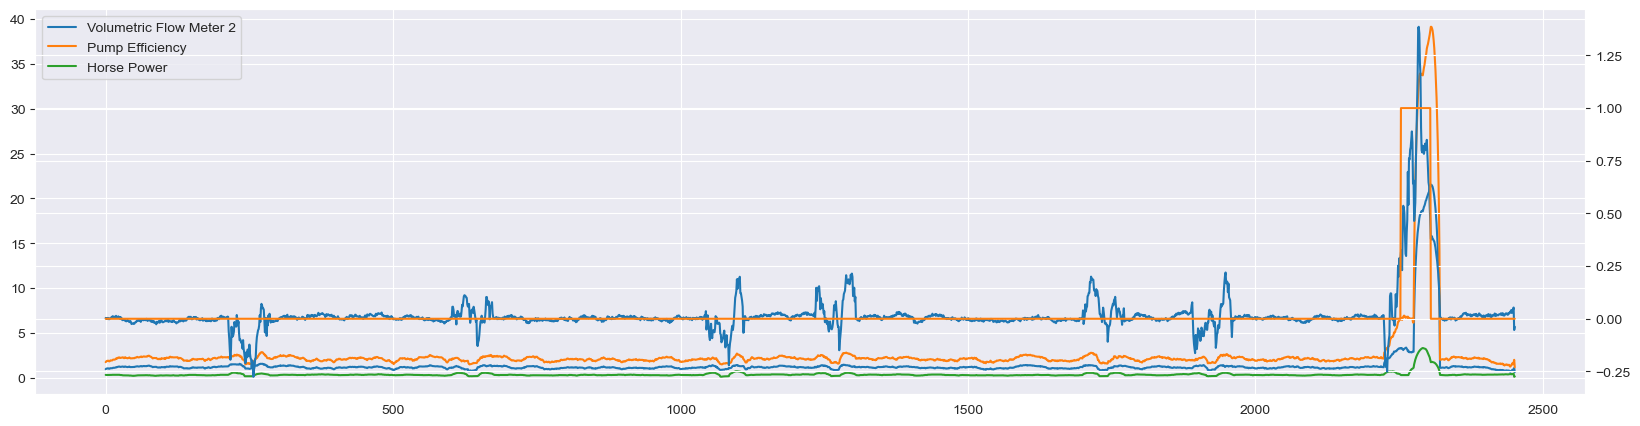

In [144]:
independent_variables= df_stdev[["Volumetric Flow Meter 2", "Horse Power", "Pump Efficiency"]]
dependent_variable= ['PUMP FAILURE (1 or 0)']

independent_variables = sm.add_constant(independent_variables)
regression_model = sm.OLS(y, independent_variables).fit()
prediction = regression_model.predict(sm.add_constant(independent_variables))
df_stdev['Prediction'] = prediction
ax1= df_stdev[['Volumetric Flow Meter 2', 'Pump Efficiency', 'Horse Power']].plot()
ax2= ax1.twinx()
ax2.plot(df_stdev['Prediction'])
ax2.plot(df_stdev['PUMP FAILURE (1 or 0)'])
plt.show()